In [1]:
from pymatgen_diffusion.aimd.rdf import \
    RadialDistributionFunction, RadialDistributionFunctionFast
from monty.serialization import loadfn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
obj = loadfn('../pymatgen_diffusion/aimd/tests/cNa3PS4_pda.json')

In [3]:
structure_list = []
for i, s in enumerate(obj.get_drift_corrected_structures()):
    structure_list.append(s)
    if i == 9: break

In [4]:
rdf_func = RadialDistributionFunction.from_species(
           structures=structure_list, ngrid=101, rmax=10.0, cell_range=1,
           sigma=0.2, species=['Na'], reference_species=['S'])

# fewer parameters in new implementations
rdf_func_faster = RadialDistributionFunctionFast(structures=structure_list, 
                                                ngrid=101, rmax=10.0, sigma=0.2)

Text(0.5, 1.0, 'Old RDF implementation')

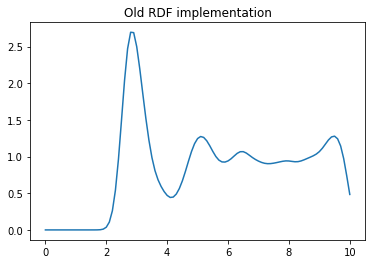

In [5]:
plt.plot(rdf_func.interval, rdf_func.rdf)
plt.title("Old RDF implementation")

Text(0.5, 1.0, 'Old coordination number')

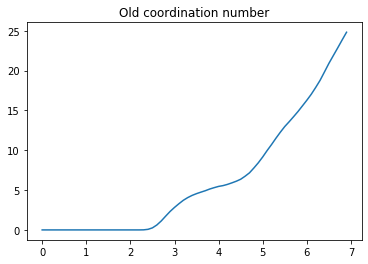

In [6]:
plt.plot(rdf_func.interval[:70], rdf_func.coordination_number[:70])
plt.title("Old coordination number")

Text(0.5, 1.0, 'New RDF implementation')

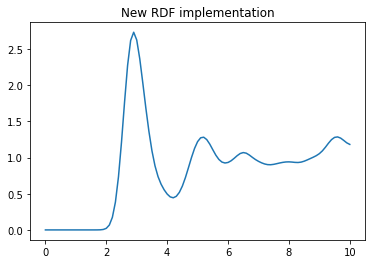

In [7]:
r, rdf2 = rdf_func_faster.get_rdf(('S', 'Na'))
plt.plot(r, rdf2)
plt.title("New RDF implementation")

Text(0.5, 1.0, 'New coordination number')

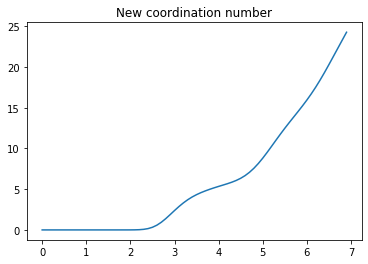

In [8]:
r, cn = rdf_func_faster.get_coordination_number(('S', 'Na'))
plt.plot(r[:70], cn[:70])
plt.title('New coordination number')

In [9]:
%%timeit -n 1

rdf_func = RadialDistributionFunction.from_species(
           structures=structure_list, ngrid=101, rmax=10.0, cell_range=1,
           sigma=0.2, species=['Na'], reference_species=['S'])

812 ms ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit -n 1
# fewer parameters in new implementations
rdf_func_faster = RadialDistributionFunctionFast(structures=structure_list, 
                                                ngrid=101, rmax=10.0, sigma=0.2)

92.6 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit -n 1
# fewer parameters in new implementations
rdf_func_faster = RadialDistributionFunctionFast(structures=structure_list, 
                                                ngrid=101, rmax=10.0, sigma=0.2, 
                                                n_jobs=2)

The slowest run took 17.72 times longer than the fastest. This could mean that an intermediate result is being cached.
879 ms ± 1.45 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
